In [ ]:
!pip install powerlaw

9
990
Random Node Removal: Graph remained connected during the removal process.


<ipython-input-31-7286013f4223>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_remove = random.sample(G.nodes(), num_nodes)


High-Degree Node Removal: Graph remained connected during the removal process.
Low-Degree Node Removal: Graph remained connected during the removal process.


<ipython-input-31-7286013f4223>:24: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges(), num_edges)


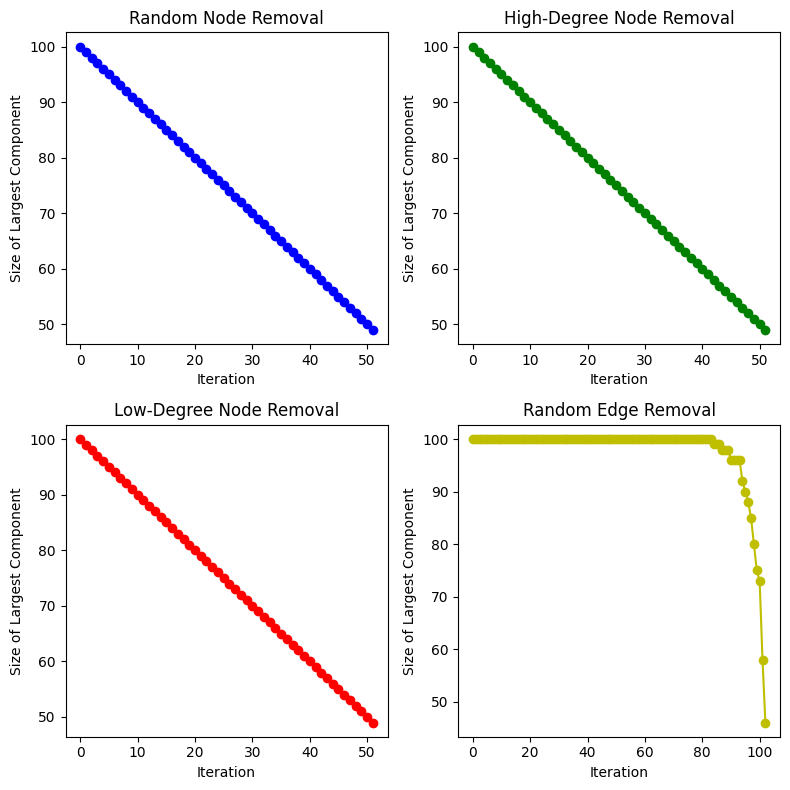

Random Edge Removal: Graph disconnected at iterations: [84, 87, 90, 94, 95, 96, 97, 98, 99, 100, 101, 102]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

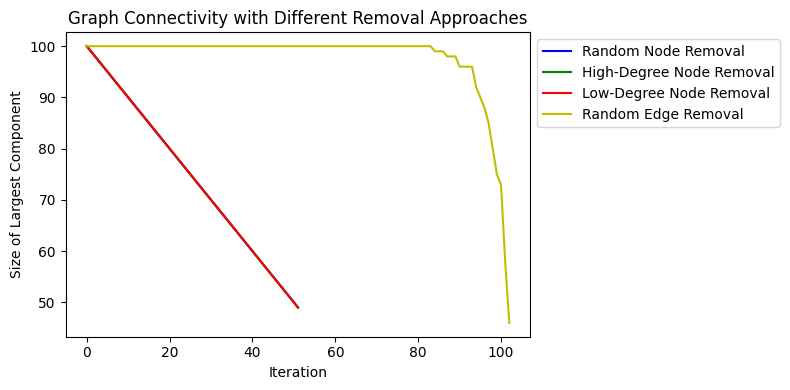

In [ ]:
### Code to find the iteration of all four node and edge removal process, where the Random graph is getting disconnected ###
import networkx as nx
import matplotlib.pyplot as plt
import random
from powerlaw import Fit

# Function to remove nodes randomly
def remove_nodes_random(G, num_nodes):
    nodes_to_remove = random.sample(G.nodes(), num_nodes)
    G.remove_nodes_from(nodes_to_remove)

# Function to remove high-degree nodes
def remove_high_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1], reverse=True)[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Function to remove low-degree nodes
def remove_low_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1])[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Function to remove random edges
def remove_random_edges(G, num_edges):
    edges_to_remove = random.sample(G.edges(), num_edges)
    G.remove_edges_from(edges_to_remove)

# Create a random network
G = nx.erdos_renyi_graph(n = 100, p = 0.2, seed=1)

# Calculate the size of the largest component in the original graph
largest_component_size1 = len(max(nx.connected_components(G), key=len))
largest_component_size2 = len(max(nx.connected_components(G), key=len))
largest_component_size3 = len(max(nx.connected_components(G), key=len))
largest_component_size4 = len(max(nx.connected_components(G), key=len))
original_graph_size = len(G)

# Define the number of nodes to remove in each iteration #(5 percent of the original graph size)
num_nodes_to_remove = 1 #int(original_graph_size * 0.05)
num_edges_to_remove = int(G.number_of_edges() * 0.01)  # 1% of edges to remove

#print(num_edges_to_remove)
#print(G.number_of_edges())

# Lists to store parameter values for plotting
largest_component_sizes1 = [largest_component_size1]
largest_component_sizes2 = [largest_component_size2]
largest_component_sizes3 = [largest_component_size3]
largest_component_sizes4 = [largest_component_size4]

# List to store the iteration values where the graph gets disconnected
disconnected_iterations1 = []
disconnected_iterations2 = []
disconnected_iterations3 = []
disconnected_iterations4 = []


# Removal iterations until the largest component is less than 50 percent(modified) of the original graph
while largest_component_size1 >= original_graph_size * 0.5:
    G_copy = G.copy()
    remove_nodes_random(G_copy, num_nodes_to_remove)

    # Check if the graph is empty (null graph)
    if len(G_copy) == 0:
        break

    # Check if the graph is connected
    if not nx.is_connected(G_copy):
        # Extract the largest connected component
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size1 = len(largest_component)
        disconnected_iterations1.append(len(largest_component_sizes1))

    else:
        # Update the size of the largest component
        largest_component_size1 = len(max(nx.connected_components(G_copy), key=len))

    # Store the results
    largest_component_sizes1.append(largest_component_size1)
    G = G_copy

# Plot the results
plt.figure(figsize=(8, 8))
# Random Node Removal
plt.subplot(2, 2, 1)
plt.plot(largest_component_sizes1, 'bo-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Random Node Removal')

# Print the list of iterations where the graph gets disconnected for each scenario
if disconnected_iterations1:
    print("Random Node Removal: Graph disconnected at iterations:", disconnected_iterations1)
else:
    print("Random Node Removal: Graph remained connected during the removal process.")

# Create a random network
G = nx.erdos_renyi_graph(n = 100, p = 0.2, seed=1)

# Removal iterations until the largest component is less than 50 percent of the original graph
while largest_component_size2 >= original_graph_size * 0.5:
    G_copy = G.copy()
    remove_high_degree_nodes(G_copy, num_nodes_to_remove)

    # Check if the graph is empty (null graph)
    if len(G_copy) == 0:
        break

    # Check if the graph is connected
    if not nx.is_connected(G_copy):
        # Extract the largest connected component
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size2 = len(largest_component)
        disconnected_iterations2.append(len(largest_component_sizes2))

    else:
        # Update the size of the largest component
        largest_component_size2 = len(max(nx.connected_components(G_copy), key=len))

    # Store the results
    largest_component_sizes2.append(largest_component_size2)
    G = G_copy

# Plot the results
plt.subplot(2, 2, 2)
plt.plot(largest_component_sizes2, 'go-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('High-Degree Node Removal')

if disconnected_iterations2:
    print("High-Degree Node Removal: Graph disconnected at iterations:", disconnected_iterations2)
else:
    print("High-Degree Node Removal: Graph remained connected during the removal process.")

# Create a random network
G = nx.erdos_renyi_graph(n = 100, p = 0.2, seed=1)

# Removal iterations until the largest component is less than 50 percent(modified) of the original graph
while largest_component_size3 >= original_graph_size * 0.5:
    G_copy = G.copy()
    remove_low_degree_nodes(G_copy, num_nodes_to_remove)

    # Check if the graph is empty (null graph)
    if len(G_copy) == 0:
        break

    # Check if the graph is connected
    if not nx.is_connected(G_copy):
        # Extract the largest connected component
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size3 = len(largest_component)
        disconnected_iterations3.append(len(largest_component_sizes3))

    else:
        # Update the size of the largest component
        largest_component_size3 = len(max(nx.connected_components(G_copy), key=len))

    # Store the results
    largest_component_sizes3.append(largest_component_size3)
    G = G_copy

# Low-Degree Node Removal
plt.subplot(2, 2, 3)
plt.plot(largest_component_sizes3, 'ro-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Low-Degree Node Removal')

if disconnected_iterations3:
    print("Low-Degree Node Removal: Graph disconnected at iterations:", disconnected_iterations3)
else:
    print("Low-Degree Node Removal: Graph remained connected during the removal process.")

# Create a random network
G = nx.erdos_renyi_graph(n = 100, p = 0.2, seed=1)

# Removal iterations until the largest component is less than 50 percent(modified) of the original graph
while largest_component_size4 >= original_graph_size* 0.5:
    G_copy = G.copy()
    remove_random_edges(G_copy, num_edges_to_remove)

    # Check if the graph is empty (null graph)
    if len(G_copy) == 0:
        break

    # Check if the graph is connected
    if not nx.is_connected(G_copy):
        # Extract the largest connected component
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size4 = len(largest_component)
        disconnected_iterations4.append(len(largest_component_sizes4))

    else:
        # Update the size of the largest component
        largest_component_size4 = len(max(nx.connected_components(G_copy), key=len))

    # Store the results
    largest_component_sizes4.append(largest_component_size4)
    G = G_copy

# Random Edge Removal
plt.subplot(2, 2, 4)
plt.plot(largest_component_sizes4, 'yo-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Random Edge Removal')

plt.tight_layout()
plt.show()

if disconnected_iterations4:
    print("Random Edge Removal: Graph disconnected at iterations:", disconnected_iterations4)
else:
    print("Random Edge Removal: Graph remained connected during the removal process.")

plt.figure(figsize=(8, 4))

# Plot all four line graphs in a single plot
plt.plot(largest_component_sizes1, 'b-', label='Random Node Removal')
plt.plot(largest_component_sizes2, 'g-', label='High-Degree Node Removal')
plt.plot(largest_component_sizes3, 'r-', label='Low-Degree Node Removal')
plt.plot(largest_component_sizes4, 'y-', label='Random Edge Removal')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Graph Connectivity with Different Removal Approaches')


plt.tight_layout()
# To save the figure as a PDF
plt.savefig("random_network_connectivity_plot.pdf", format="pdf")

from google.colab import files
files.download("/content/small_world_network_connectivity_plot.pdf")
plt.show()




2
196


<ipython-input-3-19ac3f05501b>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_remove = random.sample(G.nodes(), num_nodes)


Random Node Removal: Graph disconnected at iterations: [15, 22, 34, 37]
High-Degree Node Removal: Graph disconnected at iterations: [4, 5, 6, 8, 9, 10, 11]
Low-Degree Node Removal: Graph remained connected during the removal process.


<ipython-input-3-19ac3f05501b>:24: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges(), num_edges)


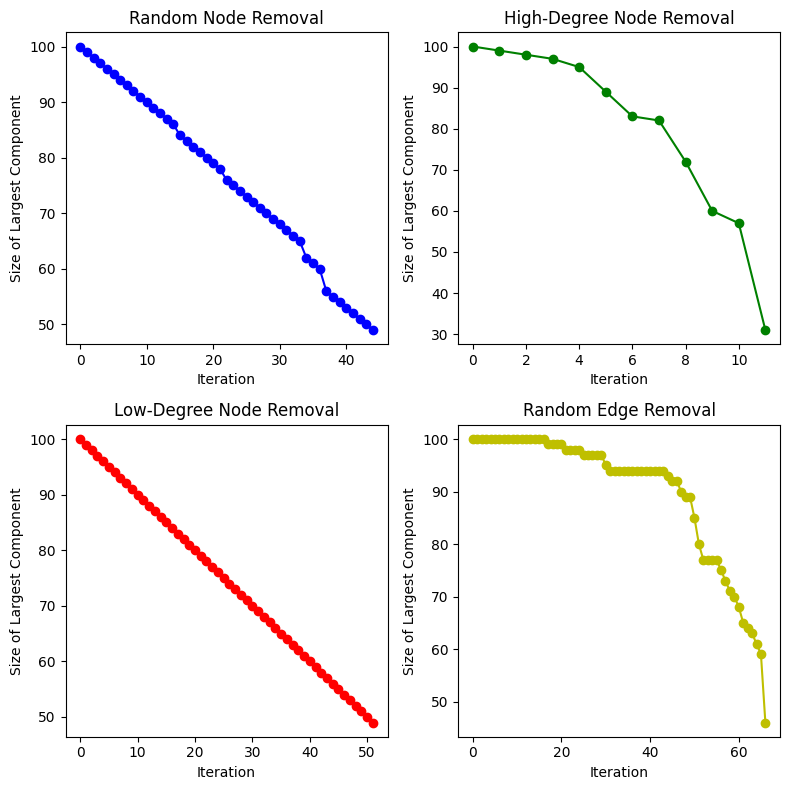

Random Edge Removal: Graph disconnected at iterations: [17, 21, 25, 30, 31, 44, 45, 47, 48, 50, 51, 52, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

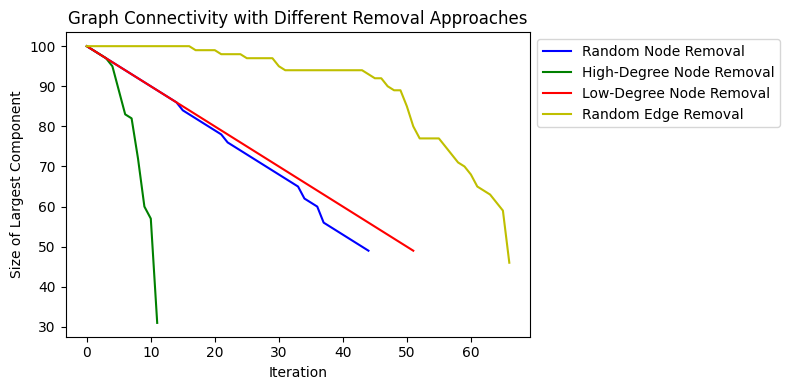

In [ ]:
### Code to find the iteration of all four node and edge removal process, where the scale-free graph is getting disconnected ###
import networkx as nx
import matplotlib.pyplot as plt
import random
from powerlaw import Fit

# Function to remove nodes randomly
def remove_nodes_random(G, num_nodes):
    nodes_to_remove = random.sample(G.nodes(), num_nodes)
    G.remove_nodes_from(nodes_to_remove)

# Function to remove high-degree nodes
def remove_high_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1], reverse=True)[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Function to remove low-degree nodes
def remove_low_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1])[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Function to remove random edges
def remove_random_edges(G, num_edges):
    edges_to_remove = random.sample(G.edges(), num_edges)
    G.remove_edges_from(edges_to_remove)

def round_to_closest(value, x, y):
    if abs(value - x) < abs(value - y):
        return int(x)
    else:
        return int(y)

# Create a Scale-Free network
G = nx.barabasi_albert_graph(100, 2, seed=1)

# Calculate the size of the largest component in the original graph
largest_component_size1 = len(max(nx.connected_components(G), key=len))
largest_component_size2 = len(max(nx.connected_components(G), key=len))
largest_component_size3 = len(max(nx.connected_components(G), key=len))
largest_component_size4 = len(max(nx.connected_components(G), key=len))
original_graph_size = len(G)

# Define the number of nodes to remove in each iteration
num_nodes_to_remove = 1 #int(original_graph_size * 0.05)
edge_percentage = 0.01
x = 1
y = 2
num_edges_to_remove = round_to_closest(G.number_of_edges() * edge_percentage, x, y)

#print(num_edges_to_remove)
#print(G.number_of_edges())

# Lists to store parameter values for plotting
largest_component_sizes1 = [largest_component_size1]
largest_component_sizes2 = [largest_component_size2]
largest_component_sizes3 = [largest_component_size3]
largest_component_sizes4 = [largest_component_size4]

# List to store the iteration values where the graph gets disconnected
disconnected_iterations1 = []
disconnected_iterations2 = []
disconnected_iterations3 = []
disconnected_iterations4 = []


# Removal iterations until the largest component is less than 50 percent(modified) of the original graph
while largest_component_size1 >= original_graph_size * 0.5:
    G_copy = G.copy()
    remove_nodes_random(G_copy, num_nodes_to_remove)

    # Check if the graph is empty (null graph)
    if len(G_copy) == 0:
        break

    # Check if the graph is connected
    if not nx.is_connected(G_copy):
        # Extract the largest connected component
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size1 = len(largest_component)
        disconnected_iterations1.append(len(largest_component_sizes1))

    else:
        # Update the size of the largest component
        largest_component_size1 = len(max(nx.connected_components(G_copy), key=len))

    # Store the results
    largest_component_sizes1.append(largest_component_size1)
    G = G_copy

# Plot the results
plt.figure(figsize=(8, 8))
# Random Node Removal
plt.subplot(2, 2, 1)
plt.plot(largest_component_sizes1, 'bo-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Random Node Removal')

# Print the list of iterations where the graph gets disconnected for each scenario
if disconnected_iterations1:
    print("Random Node Removal: Graph disconnected at iterations:", disconnected_iterations1)
else:
    print("Random Node Removal: Graph remained connected during the removal process.")

# Create a Scale-Free network
G = nx.barabasi_albert_graph(100, 2, seed=1)
# Removal iterations until the largest component is less than 50 percent(modified) of the original graph
while largest_component_size2 >= original_graph_size * 0.5:
    G_copy = G.copy()
    remove_high_degree_nodes(G_copy, num_nodes_to_remove)

    # Check if the graph is empty (null graph)
    if len(G_copy) == 0:
        break

    # Check if the graph is connected
    if not nx.is_connected(G_copy):
        # Extract the largest connected component
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size2 = len(largest_component)
        disconnected_iterations2.append(len(largest_component_sizes2))

    else:
        # Update the size of the largest component
        largest_component_size2 = len(max(nx.connected_components(G_copy), key=len))

    # Store the results
    largest_component_sizes2.append(largest_component_size2)
    G = G_copy

# Plot the results
plt.subplot(2, 2, 2)
plt.plot(largest_component_sizes2, 'go-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('High-Degree Node Removal')

if disconnected_iterations2:
    print("High-Degree Node Removal: Graph disconnected at iterations:", disconnected_iterations2)
else:
    print("High-Degree Node Removal: Graph remained connected during the removal process.")

# Create a Scale-Free network
G = nx.barabasi_albert_graph(100, 2, seed=1)

# Removal iterations until the largest component is less than 50 percent(modified) of the original graph
while largest_component_size3 >= original_graph_size * 0.5:
    G_copy = G.copy()
    remove_low_degree_nodes(G_copy, num_nodes_to_remove)

    # Check if the graph is empty (null graph)
    if len(G_copy) == 0:
        break

    # Check if the graph is connected
    if not nx.is_connected(G_copy):
        # Extract the largest connected component
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size3 = len(largest_component)
        disconnected_iterations3.append(len(largest_component_sizes3))

    else:
        # Update the size of the largest component
        largest_component_size3 = len(max(nx.connected_components(G_copy), key=len))

    # Store the results
    largest_component_sizes3.append(largest_component_size3)
    G = G_copy

# Low-Degree Node Removal
plt.subplot(2, 2, 3)
plt.plot(largest_component_sizes3, 'ro-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Low-Degree Node Removal')

if disconnected_iterations3:
    print("Low-Degree Node Removal: Graph disconnected at iterations:", disconnected_iterations3)
else:
    print("Low-Degree Node Removal: Graph remained connected during the removal process.")

# Create a Scale-Free network
G = nx.barabasi_albert_graph(100, 2, seed=1)

# Removal iterations until the largest component is less than 50 percent(modified) of the original graph
while largest_component_size4 >= original_graph_size* 0.5:
    G_copy = G.copy()
    remove_random_edges(G_copy, num_edges_to_remove)

    # Check if the graph is empty (null graph)
    if len(G_copy) == 0:
        break

    # Check if the graph is connected
    if not nx.is_connected(G_copy):
        # Extract the largest connected component
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size4 = len(largest_component)
        disconnected_iterations4.append(len(largest_component_sizes4))

    else:
        # Update the size of the largest component
        largest_component_size4 = len(max(nx.connected_components(G_copy), key=len))

    # Store the results
    largest_component_sizes4.append(largest_component_size4)
    G = G_copy

# Random Edge Removal
plt.subplot(2, 2, 4)
plt.plot(largest_component_sizes4, 'yo-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Random Edge Removal')

plt.tight_layout()
plt.show()

if disconnected_iterations4:
    print("Random Edge Removal: Graph disconnected at iterations:", disconnected_iterations4)
else:
    print("Random Edge Removal: Graph remained connected during the removal process.")
plt.figure(figsize=(8, 4))

# Plot all four line graphs in a single plot
plt.plot(largest_component_sizes1, 'b-', label='Random Node Removal')
plt.plot(largest_component_sizes2, 'g-', label='High-Degree Node Removal')
plt.plot(largest_component_sizes3, 'r-', label='Low-Degree Node Removal')
plt.plot(largest_component_sizes4, 'y-', label='Random Edge Removal')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Graph Connectivity with Different Removal Approaches')
#plt.legend()

plt.tight_layout()
# To save the figure as a PDF
plt.savefig("scale_free_network_connectivity_plot.pdf", format="pdf")

from google.colab import files
files.download("/content/scale_free_network_connectivity_plot.pdf")
plt.show()







200
Random Node Removal: Graph disconnected at iterations: [15, 28, 30, 33, 35]


<ipython-input-3-dacdfda08e94>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_remove = random.sample(G.nodes(), num_nodes)


High-Degree Node Removal: Graph disconnected at iterations: [16, 20, 22, 23, 25, 28]
Low-Degree Node Removal: Graph remained connected during the removal process.


<ipython-input-3-dacdfda08e94>:24: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges(), num_edges)


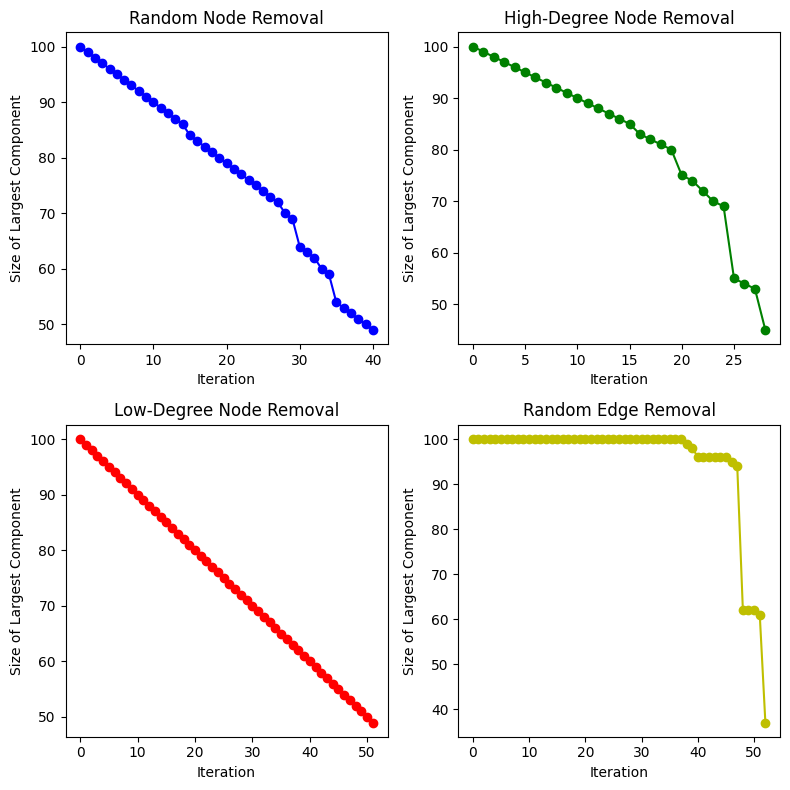

Random Edge Removal: Graph disconnected at iterations: [38, 39, 40, 46, 47, 48, 51, 52]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

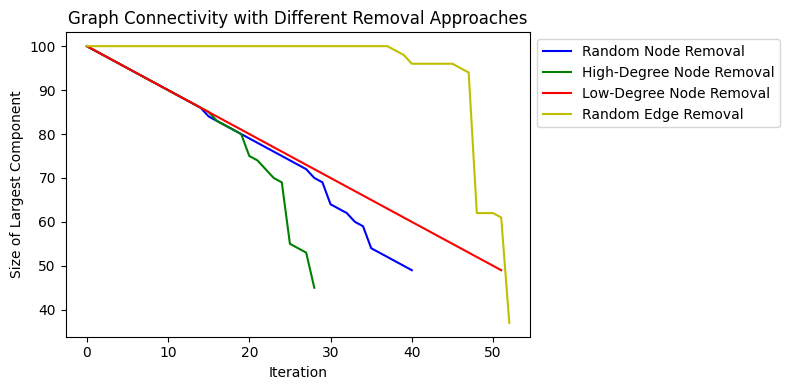

In [ ]:
### Code to find the iteration of all four node and edge removal process, where the small-world graph is getting disconnected ###
import networkx as nx
import matplotlib.pyplot as plt
import random
from powerlaw import Fit

# Random node removal
def remove_nodes_random(G, num_nodes):
    nodes_to_remove = random.sample(G.nodes(), num_nodes)
    G.remove_nodes_from(nodes_to_remove)

# High degree nide removal function
def remove_high_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1], reverse=True)[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Low-degree node removal
def remove_low_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1])[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Random edge removal
def remove_random_edges(G, num_edges):
    edges_to_remove = random.sample(G.edges(), num_edges)
    G.remove_edges_from(edges_to_remove)

# Create a Small-World network
G = nx.watts_strogatz_graph(n =100, k = 4, p =0.2,seed =1)
print(G.number_of_edges())

# Size of the largest component in the original graph
largest_component_size1 = len(max(nx.connected_components(G), key=len))

original_graph_size = len(G)

# Number of nodes or percentage of nodes to remove in each iteration
num_nodes_to_remove = 1 #int(original_graph_size * 0.05) # we can define the percentage of removal or the number of removal
num_edges_to_remove = int(G.number_of_edges() * 0.01)  # 1% of edges to remove

# Initialize lists of components to store the ploting parametera
largest_component_sizes1 = [largest_component_size1]

# this list saves the each iterations where the graph gets disconnected
disconnected_iterations1 = []

# Following code is to plot individual plots of disconnection
# continued iterations of removal until the largest component is less than 50 percent of the original graph
while largest_component_size1 >= original_graph_size * 0.5:
    G_copy = G.copy()
    remove_nodes_random(G_copy, num_nodes_to_remove)

    # Check if the graph is a null graph
    if len(G_copy) == 0:
        break

    # To make sure that the graph is connected
    if not nx.is_connected(G_copy):
        # Take the largest component of grpah
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size1 = len(largest_component)
        disconnected_iterations1.append(len(largest_component_sizes1))

    else:
        # Update the size of the largest component
        largest_component_size1 = len(max(nx.connected_components(G_copy), key=len))

    largest_component_sizes1.append(largest_component_size1)
    G = G_copy

plt.figure(figsize=(8, 8))

# Random Node Removal
plt.subplot(2, 2, 1)
plt.plot(largest_component_sizes1, 'bo-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Random Node Removal')

# Print the list of iterations where the graph gets disconnected for each scenario
if disconnected_iterations1:
    print("Random Node Removal: Graph disconnected at iterations:", disconnected_iterations1)
else:
    print("Random Node Removal: Graph remained connected during the removal process.")

# Create again the same small_world network and repeat the process
G = nx.watts_strogatz_graph(n =100, k = 4, p =0.2,seed =1)
largest_component_size2 = len(max(nx.connected_components(G), key=len))
largest_component_sizes2 = [largest_component_size2]
disconnected_iterations2 = []

# continued iterations of removal until the largest component is less than 50 percent of the original graph
while largest_component_size2 >= original_graph_size * 0.5:
    G_copy = G.copy()
    remove_high_degree_nodes(G_copy, num_nodes_to_remove)

    # Check if the graph is a null graph
    if len(G_copy) == 0:
        break

    # To make sure that the graph is connected
    if not nx.is_connected(G_copy):
        # Take the largest component of grpah
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size2 = len(largest_component)
        disconnected_iterations2.append(len(largest_component_sizes2))

    else:
        # Update the size of the largest component
        largest_component_size2 = len(max(nx.connected_components(G_copy), key=len))

    largest_component_sizes2.append(largest_component_size2)
    G = G_copy

# High-degree node removal
plt.subplot(2, 2, 2)
plt.plot(largest_component_sizes2, 'go-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('High-Degree Node Removal')

if disconnected_iterations2:
    print("High-Degree Node Removal: Graph disconnected at iterations:", disconnected_iterations2)
else:
    print("High-Degree Node Removal: Graph remained connected during the removal process.")

G = nx.watts_strogatz_graph(n =100, k = 4, p =0.2,seed =1)
largest_component_size3 = len(max(nx.connected_components(G), key=len))
largest_component_sizes3 = [largest_component_size3]
disconnected_iterations3 = []

# continued iterations of removal until the largest component is less than 50 percent of the original graph
while largest_component_size3 >= original_graph_size * 0.5:
    G_copy = G.copy()
    remove_low_degree_nodes(G_copy, num_nodes_to_remove)

    # Check if the graph is a null graph
    if len(G_copy) == 0:
        break

    # To make sure that the graph is connected
    if not nx.is_connected(G_copy):
        # Take the largest component of grpah
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size3 = len(largest_component)
        disconnected_iterations3.append(len(largest_component_sizes3))

    else:
        # Update the size of the largest component
        largest_component_size3 = len(max(nx.connected_components(G_copy), key=len))

    largest_component_sizes3.append(largest_component_size3)
    G = G_copy

# Low-Degree Node Removal
plt.subplot(2, 2, 3)
plt.plot(largest_component_sizes3, 'ro-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Low-Degree Node Removal')

if disconnected_iterations3:
    print("Low-Degree Node Removal: Graph disconnected at iterations:", disconnected_iterations3)
else:
    print("Low-Degree Node Removal: Graph remained connected during the removal process.")

G = nx.watts_strogatz_graph(n =100, k = 4, p =0.2,seed =1)
largest_component_size4 = len(max(nx.connected_components(G), key=len))
largest_component_sizes4 = [largest_component_size4]
disconnected_iterations4 = []

# continued iterations of removal until the largest component is less than 50 percent of the original graph
while largest_component_size4 >= original_graph_size* 0.5:
    G_copy = G.copy()
    remove_random_edges(G_copy, num_edges_to_remove)

    # Check if the graph is a null graph
    if len(G_copy) == 0:
        break

    # To make sure that the graph is connected
    if not nx.is_connected(G_copy):
        # Take the largest component of grpah
        largest_component = max(nx.connected_components(G_copy), key=len)
        G_copy = G_copy.subgraph(largest_component).copy()

        # Update the size of the largest component
        largest_component_size4 = len(largest_component)
        disconnected_iterations4.append(len(largest_component_sizes4))

    else:
        # Update the size of the largest component
        largest_component_size4 = len(max(nx.connected_components(G_copy), key=len))

    largest_component_sizes4.append(largest_component_size4)
    G = G_copy

# Random Edge Removal
plt.subplot(2, 2, 4)
plt.plot(largest_component_sizes4, 'yo-')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Random Edge Removal')

plt.tight_layout()
plt.show()

if disconnected_iterations4:
    print("Random Edge Removal: Graph disconnected at iterations:", disconnected_iterations4)
else:
    print("Random Edge Removal: Graph remained connected during the removal process.")
plt.figure(figsize=(8, 4))

# Plot all four graphs in a single plot
plt.plot(largest_component_sizes1, 'b-', label='Random Node Removal')
plt.plot(largest_component_sizes2, 'g-', label='High-Degree Node Removal')
plt.plot(largest_component_sizes3, 'r-', label='Low-Degree Node Removal')
plt.plot(largest_component_sizes4, 'y-', label='Random Edge Removal')

plt.xlabel('Iteration')
plt.ylabel('Size of Largest Component')
plt.title('Graph Connectivity with Different Removal Approaches')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# To save the figure as PDF
plt.savefig("small_world_network_connectivity_plot.pdf", format="pdf")
# To download the figure from google colab
from google.colab import files
files.download("/content/small_world_network_connectivity_plot.pdf")
plt.show()








Frequency distribution plots and Structure alteration tests
K-S and CvM tests

<ipython-input-3-c7fc6f65726e>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_remove = random.sample(G.nodes(), num_nodes)


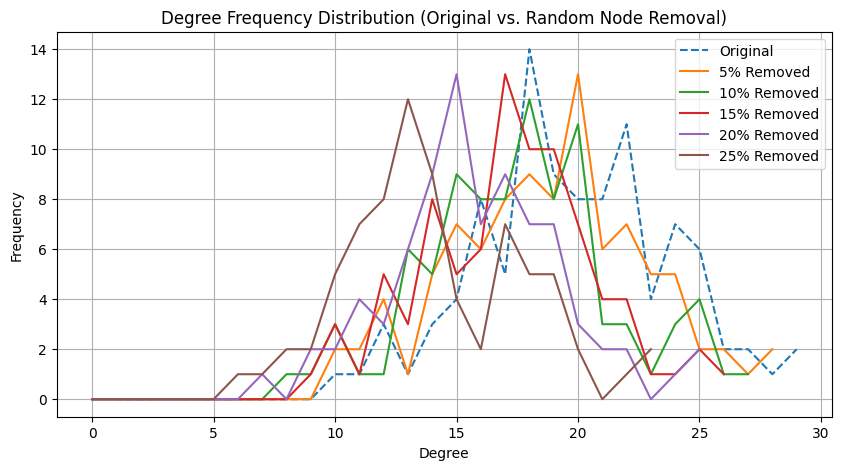

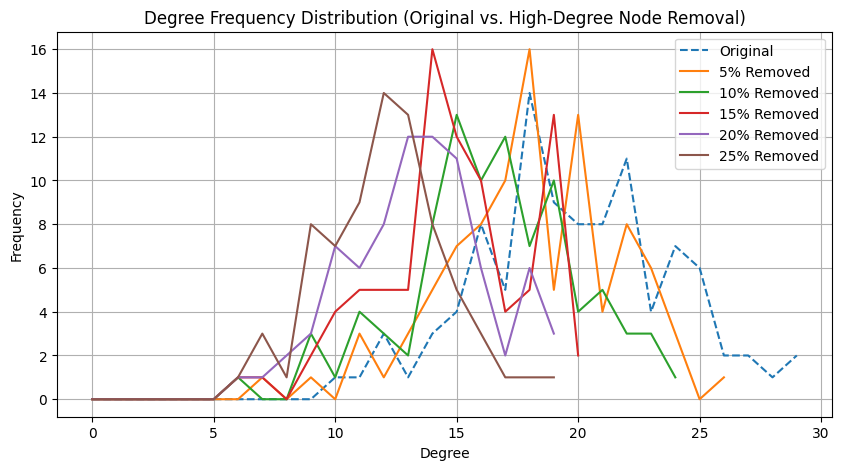

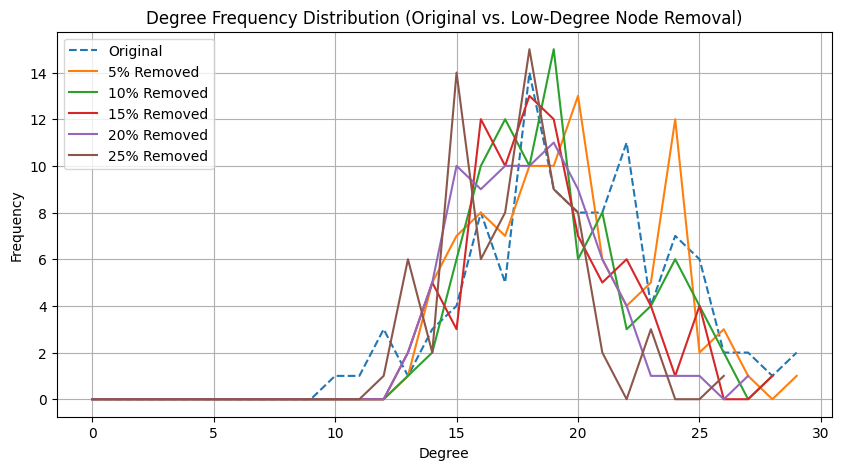

<ipython-input-3-c7fc6f65726e>:25: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges(), num_edges)


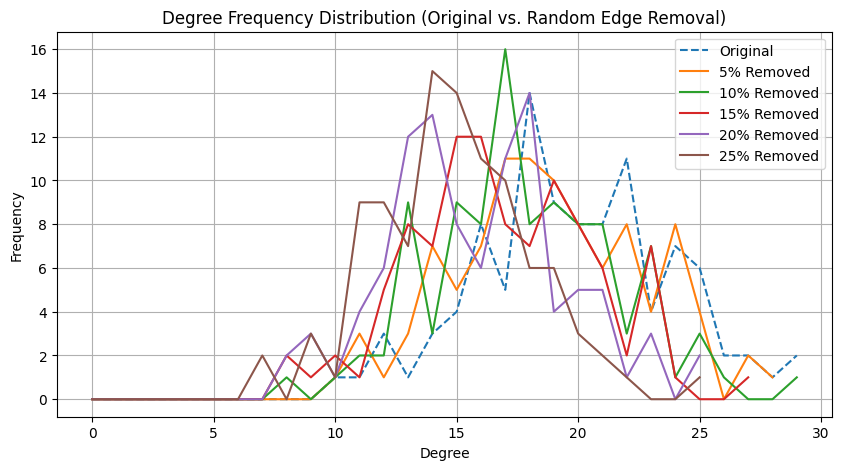

In [ ]:
# frequency distribution plots after four removal strategy in random network
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kstest
import random

# Function to remove nodes randomly
def remove_nodes_random(G, num_nodes):
    nodes_to_remove = random.sample(G.nodes(), num_nodes)
    G.remove_nodes_from(nodes_to_remove)

# Function to remove high-degree nodes
def remove_high_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1], reverse=True)[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Function to remove low-degree nodes
def remove_low_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1])[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Function to remove random edges
def remove_random_edges(G, num_edges):
    edges_to_remove = random.sample(G.edges(), num_edges)
    G.remove_edges_from(edges_to_remove)

# Step 1: Generate the original random network
original_network = nx.erdos_renyi_graph(100, 0.2, seed=1)

# Create a list to store frequency distributions at different removal percentages
a = []
removal_percentages = [5, 10, 15, 20, 25]  # Specify the removal percentages

# Calculate the degree frequency distribution of the original network
degree_sequence_original = sorted([d for n, d in original_network.degree()], reverse=True)
frequency_distribution_original = np.bincount(degree_sequence_original)

# Create a separate plot for each strategy
for strategy_name, removal_function in [('Random Node Removal', remove_nodes_random),
                                        ('High-Degree Node Removal', remove_high_degree_nodes),
                                        ('Low-Degree Node Removal', remove_low_degree_nodes),
                                        ('Random Edge Removal', remove_random_edges)]:
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(frequency_distribution_original)), frequency_distribution_original, label='Original', linestyle='--')

    for percentage in removal_percentages:
        # Create a copy of the original network
        network_copy = original_network.copy()

        # Calculate the number of nodes or edges to remove based on the specified percentage
        if 'Edge' in strategy_name:
            num_removal = int(network_copy.number_of_edges() * (percentage / 100))
            removal_function(network_copy, num_removal)
        else:
            num_removal = int(network_copy.number_of_nodes() * (percentage / 100))
            removal_function(network_copy, num_removal)

        # Calculate the degree frequency distribution after node or edge removal
        degree_sequence_reduced = sorted([d for n, d in network_copy.degree()], reverse=True)
        frequency_distribution_reduced = np.bincount(degree_sequence_reduced)

        # Plot the frequency distribution
        plt.plot(range(len(frequency_distribution_reduced)), frequency_distribution_reduced, label=f'{percentage}% Removed')


    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(f'Degree Frequency Distribution (Original vs. {strategy_name})')
    plt.legend()
    plt.grid(True)

    # To save the figure as a PDF with the appropriate name
    plt.savefig(f"random_network_frequency_distribution_plot_{strategy_name}.pdf", format="pdf")


    # Show and download the plot
    plt.show()

from google.colab import files
files.download("/content/random_network_frequency_distribution_plot_Random Node Removal.pdf")
files.download("/content/random_network_frequency_distribution_plot_High-Degree Node Removal.pdf")
files.download("/content/random_network_frequency_distribution_plot_Low-Degree Node Removal.pdf")
files.download("/content/random_network_frequency_distribution_plot_Random Edge Removal.pdf")


In [ ]:
# Random Network
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# Random node removal function
def remove_nodes_random(G, num_nodes):
    nodes_to_remove = random.sample(G.nodes(), num_nodes)
    G.remove_nodes_from(nodes_to_remove)

# High-degrees node removal function
def remove_high_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1], reverse=True)[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Low-degree node removal function
def remove_low_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1])[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Random edge removal function
def remove_random_edges(G, num_edges):
    edges_to_remove = random.sample(G.edges(), num_edges)
    G.remove_edges_from(edges_to_remove)

# Generate the original random network
original_network = nx.erdos_renyi_graph(100, 0.2, seed=1)

# list to store frequency distributions at different removal percentages
frequency_distributions = []

removal_percentages = [5, 10, 15, 20, 25]  # removal percentages

# Degree frequency distribution of the original network
degree_sequence_original = [d for n, d in original_network.degree()]
frequency_distribution_original = np.bincount(degree_sequence_original)

# To create a separate plot for each strategy
for strategy_name, removal_function in [('Random Node Removal', remove_nodes_random),
                                       ('High-Degree Node Removal', remove_high_degree_nodes),
                                       ('Low-Degree Node Removal', remove_low_degree_nodes),
                                       ('Random Edge Removal', remove_random_edges)]:

    for percentage in removal_percentages:
        # Copy of the original network to perform removal process on it
        network_copy = original_network.copy()

        # Calculate the number of nodes or edges to remove based on the specified percentage
        if 'Edge' in strategy_name:
            num_removal = int(network_copy.number_of_edges() * (percentage / 100))
            removal_function(network_copy, num_removal)
        else:
            num_removal = int(network_copy.number_of_nodes() * (percentage / 100))
            removal_function(network_copy, num_removal)

        # Degree frequency distribution of the network after removal process
        degree_sequence_reduced = [d for n, d in network_copy.degree()]
        frequency_distribution_reduced = np.bincount(degree_sequence_reduced)

        # The CvM test

        w = stats.cramervonmises_2samp(degree_sequence_original, degree_sequence_reduced)
        w1 = stats.ks_2samp(degree_sequence_original, degree_sequence_reduced)
        # Remove the # sign below and check the results of the test for frequency distributions as well
        #w = stats.cramervonmises_2samp(frequency_distribution_original, frequency_distribution_reduced)
        #w1 = stats.ks_2samp(frequency_distribution_original, frequency_distribution_reduced)



        print(f'{strategy_name} - {percentage}% Removed - CvM statistics: {w.statistic}, p-value: {w.pvalue}, K-s Statistics: {w1.statistic}, p-value: {w1.pvalue}')


<ipython-input-2-5e9370f9adc9>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_remove = random.sample(G.nodes(), num_nodes)


Random Node Removal - 5% Removed - CvM statistics: 0.1354678362573125, p-value: 0.44035854484502146, K-s Statistics: 0.08263157894736842, p-value: 0.8562975111931403
Random Node Removal - 10% Removed - CvM statistics: 0.9318669590643296, p-value: 0.0035350982972220946, K-s Statistics: 0.2, p-value: 0.03830453866332627
Random Node Removal - 15% Removed - CvM statistics: 2.886857710651828, p-value: 1.3020956202147715e-07, K-s Statistics: 0.3517647058823529, p-value: 1.4229608688010723e-05
Random Node Removal - 20% Removed - CvM statistics: 3.454563657407409, p-value: 7.188952877434929e-09, K-s Statistics: 0.4025, p-value: 6.089348484159261e-07
Random Node Removal - 25% Removed - CvM statistics: 5.521680952380951, p-value: 3.5104585904832675e-10, K-s Statistics: 0.54, p-value: 5.8459404891336735e-12
High-Degree Node Removal - 5% Removed - CvM statistics: 0.8887741790373411, p-value: 0.004472850043172105, K-s Statistics: 0.19842105263157894, p-value: 0.03604581747787403
High-Degree Node Re

<ipython-input-2-5e9370f9adc9>:25: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges(), num_edges)


[25, 21, 16, 13, 11, 11, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


<ipython-input-2-e12ac2df64d5>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_remove = random.sample(G.nodes(), num_nodes)


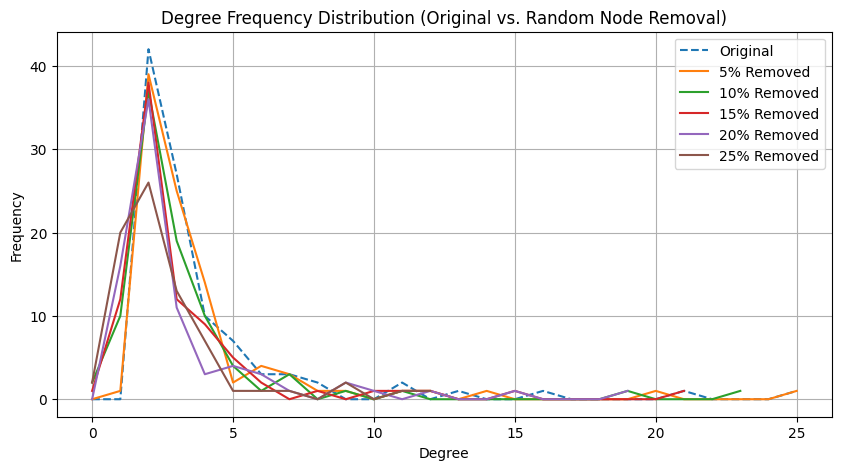

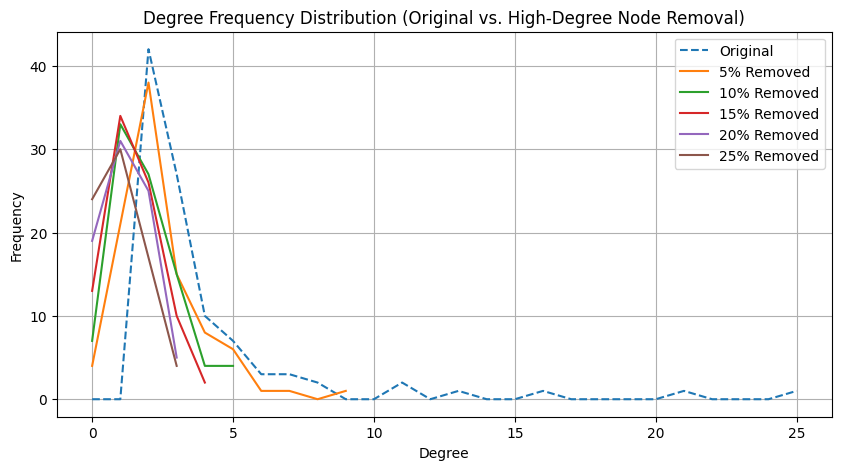

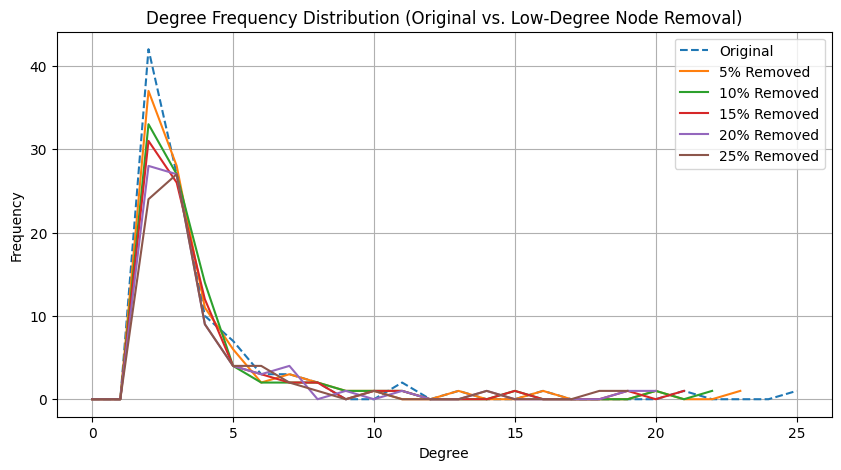

<ipython-input-2-e12ac2df64d5>:26: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges(), num_edges)


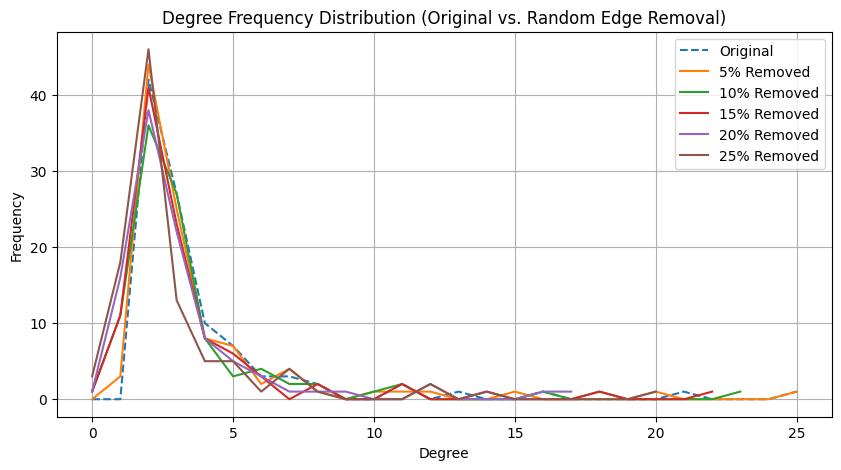

In [ ]:
# frequency distribution plots after four removal strategy in scale-free graph

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kstest
import random

# Function to remove nodes randomly
def remove_nodes_random(G, num_nodes):
    nodes_to_remove = random.sample(G.nodes(), num_nodes)
    G.remove_nodes_from(nodes_to_remove)

# Function to remove high-degree nodes
def remove_high_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1], reverse=True)[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Function to remove low-degree nodes
def remove_low_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1])[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Function to remove random edges
def remove_random_edges(G, num_edges):
    edges_to_remove = random.sample(G.edges(), num_edges)
    G.remove_edges_from(edges_to_remove)

# Step 1: Generate the original scale-free network
original_network = nx.barabasi_albert_graph(100, 2, seed = 1)

# Create a list to store frequency distributions at different removal percentages
a = []
removal_percentages = [5, 10, 15, 20, 25]  # Specify the removal percentages

# Calculate the degree frequency distribution of the original network
degree_sequence_original = sorted([d for n, d in original_network.degree()], reverse=True)
frequency_distribution_original = np.bincount(degree_sequence_original)
print(degree_sequence_original)
# Create a separate plot for each strategy
for strategy_name, removal_function in [('Random Node Removal', remove_nodes_random),
                                        ('High-Degree Node Removal', remove_high_degree_nodes),
                                        ('Low-Degree Node Removal', remove_low_degree_nodes),
                                        ('Random Edge Removal', remove_random_edges)]:
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(frequency_distribution_original)), frequency_distribution_original, label='Original', linestyle='--')

    for percentage in removal_percentages:
        # Create a copy of the original network to avoid modifying it
        network_copy = original_network.copy()

        # Calculate the number of nodes or edges to remove based on the specified percentage
        if 'Edge' in strategy_name:
            num_removal = int(network_copy.number_of_edges() * (percentage / 100))
            removal_function(network_copy, num_removal)
        else:
            num_removal = int(network_copy.number_of_nodes() * (percentage / 100))
            removal_function(network_copy, num_removal)

        # Calculate the degree frequency distribution after node or edge removal
        degree_sequence_reduced = sorted([d for n, d in network_copy.degree()], reverse=True)
        frequency_distribution_reduced = np.bincount(degree_sequence_reduced)

        # Plot the frequency distribution
        plt.plot(range(len(frequency_distribution_reduced)), frequency_distribution_reduced, label=f'{percentage}% Removed')

    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(f'Degree Frequency Distribution (Original vs. {strategy_name})')
    plt.legend()
    plt.grid(True)

    # Save the figure as a PDF with the appropriate name
    plt.savefig(f"scale_free_network_frequency_distribution_plot_{strategy_name}.pdf", format="pdf")


    # Show and download the plot
    plt.show()

from google.colab import files
files.download("/content/scale_free_network_frequency_distribution_plot_Random Node Removal.pdf")
files.download("/content/scale_free_network_frequency_distribution_plot_High-Degree Node Removal.pdf")
files.download("/content/scale_free_network_frequency_distribution_plot_Low-Degree Node Removal.pdf")
files.download("/content/scale_free_network_frequency_distribution_plot_Random Edge Removal.pdf")


In [ ]:
# Scale-free Network
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# Random node removal function
def remove_nodes_random(G, num_nodes):
    nodes_to_remove = random.sample(G.nodes(), num_nodes)
    G.remove_nodes_from(nodes_to_remove)

# High-degrees node removal function
def remove_high_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1], reverse=True)[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Low-degree node removal function
def remove_low_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1])[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Random edge removal function
def remove_random_edges(G, num_edges):
    edges_to_remove = random.sample(G.edges(), num_edges)
    G.remove_edges_from(edges_to_remove)

# Generate the scale-free network
original_network = nx.barabasi_albert_graph(100, 2, seed = 1)

# list to store frequency distributions at different removal percentages
frequency_distributions = []

removal_percentages = [5, 10, 15, 20, 25]  # removal percentages

# Degree frequency distribution of the original network
degree_sequence_original = [d for n, d in original_network.degree()]
frequency_distribution_original = np.bincount(degree_sequence_original)

# To create a separate plot for each strategy
for strategy_name, removal_function in [('Random Node Removal', remove_nodes_random),
                                       ('High-Degree Node Removal', remove_high_degree_nodes),
                                       ('Low-Degree Node Removal', remove_low_degree_nodes),
                                       ('Random Edge Removal', remove_random_edges)]:

    for percentage in removal_percentages:
        # Copy of the original network to perform removal process on it
        network_copy = original_network.copy()

        # Calculate the number of nodes or edges to remove based on the specified percentage
        if 'Edge' in strategy_name:
            num_removal = int(network_copy.number_of_edges() * (percentage / 100))
            removal_function(network_copy, num_removal)
        else:
            num_removal = int(network_copy.number_of_nodes() * (percentage / 100))
            removal_function(network_copy, num_removal)

        # Degree frequency distribution of the network after removal process
        degree_sequence_reduced = [d for n, d in network_copy.degree()]
        frequency_distribution_reduced = np.bincount(degree_sequence_reduced)

        # The CvM test
        # The CvM test
        w = stats.cramervonmises_2samp(degree_sequence_original, degree_sequence_reduced)
        w1 = stats.ks_2samp(degree_sequence_original, degree_sequence_reduced)
        #w = stats.cramervonmises_2samp(frequency_distribution_original, frequency_distribution_reduced, method='auto')
        #w1 = stats.ks_2samp(frequency_distribution_original, frequency_distribution_reduced, method = 'auto')



        print(f'{strategy_name} - {percentage}% Removed - CvM statistics: {w.statistic}, p-value: {w.pvalue}, K-s Statistics: {w1.statistic}, p-value: {w1.pvalue}')


Random Node Removal - 5% Removed - CvM statistics: 0.03634098065677449, p-value: 0.9563774596456062, K-s Statistics: 0.03263157894736842, p-value: 0.9999999492085282
Random Node Removal - 10% Removed - CvM statistics: 0.1854868421052629, p-value: 0.29927266103907313, K-s Statistics: 0.08888888888888889, p-value: 0.8092083752476609
Random Node Removal - 15% Removed - CvM statistics: 0.2838680445151063, p-value: 0.15076196641881257, K-s Statistics: 0.0976470588235294, p-value: 0.7269283110917707
Random Node Removal - 20% Removed - CvM statistics: 0.5120671296296315, p-value: 0.03710750093072912, K-s Statistics: 0.15, p-value: 0.24563233880550928
Random Node Removal - 25% Removed - CvM statistics: 1.3568476190476204, p-value: 0.00036167107764140116, K-s Statistics: 0.21333333333333335, p-value: 0.035385720697659315
High-Degree Node Removal - 5% Removed - CvM statistics: 2.011415879442197, p-value: 1.1804349732913444e-05, K-s Statistics: 0.2631578947368421, p-value: 0.0017787638686667699
H

<ipython-input-5-b7462afe6404>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_remove = random.sample(G.nodes(), num_nodes)
<ipython-input-5-b7462afe6404>:25: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges(), num_edges)


<ipython-input-1-857468633512>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_remove = random.sample(G.nodes(), num_nodes)


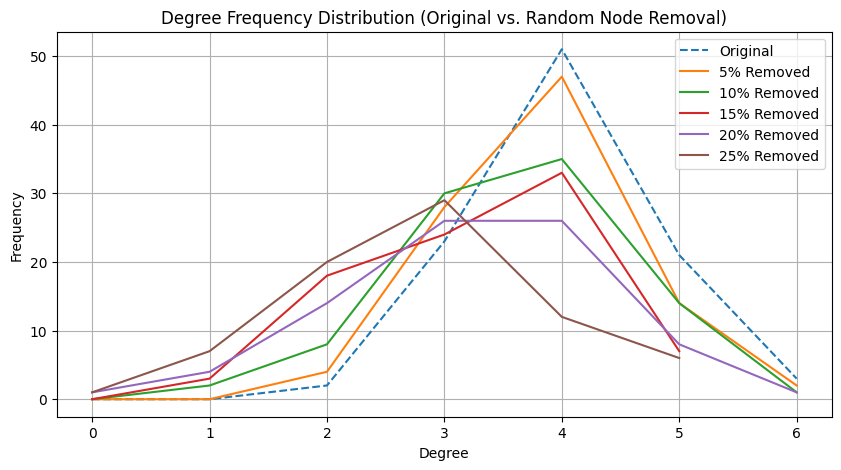

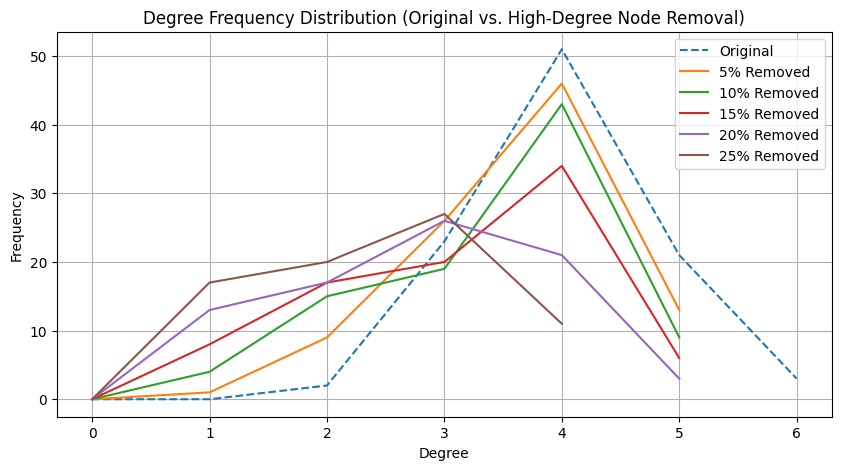

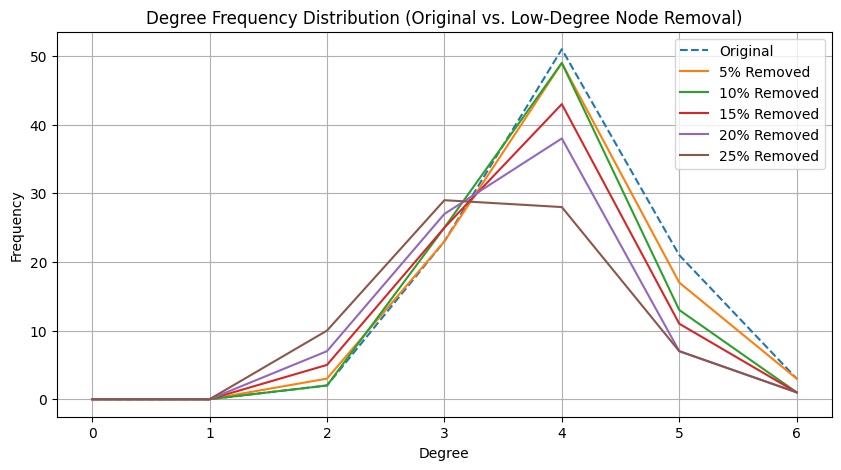

<ipython-input-1-857468633512>:26: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges(), num_edges)


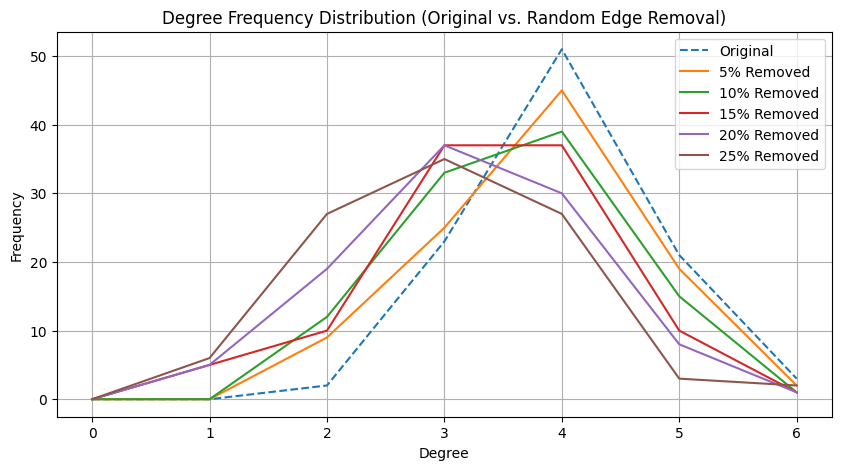

In [ ]:
# Frequency distribution plots after four removal strategy in small-world graph

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kstest
import random

# Function to remove nodes randomly
def remove_nodes_random(G, num_nodes):
    nodes_to_remove = random.sample(G.nodes(), num_nodes)
    G.remove_nodes_from(nodes_to_remove)

# Function to remove high-degree nodes
def remove_high_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1], reverse=True)[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Function to remove low-degree nodes
def remove_low_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1])[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Function to remove random edges
def remove_random_edges(G, num_edges):
    edges_to_remove = random.sample(G.edges(), num_edges)
    G.remove_edges_from(edges_to_remove)

# Step 1: Generate the original small-world network
original_network = nx.watts_strogatz_graph(n =100, k = 4, p =0.2,seed =1)


removal_percentages = [5, 10, 15, 20, 25]  # Specify the removal percentages

# Calculate the degree frequency distribution of the original network
degree_sequence_original = sorted([d for n, d in original_network.degree()], reverse=True)
frequency_distribution_original = np.bincount(degree_sequence_original)

# Create a separate plot for each strategy
for strategy_name, removal_function in [('Random Node Removal', remove_nodes_random),
                                        ('High-Degree Node Removal', remove_high_degree_nodes),
                                        ('Low-Degree Node Removal', remove_low_degree_nodes),
                                        ('Random Edge Removal', remove_random_edges)]:
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(frequency_distribution_original)), frequency_distribution_original, label='Original', linestyle='--')

    for percentage in removal_percentages:
        # Create a copy of the original network to avoid modifying it
        network_copy = original_network.copy()

        # Calculate the number of nodes or edges to remove based on the specified percentage
        if 'Edge' in strategy_name:
            num_removal = int(network_copy.number_of_edges() * (percentage / 100))
            removal_function(network_copy, num_removal)
        else:
            num_removal = int(network_copy.number_of_nodes() * (percentage / 100))
            removal_function(network_copy, num_removal)

        # Calculate the degree frequency distribution after node or edge removal
        degree_sequence_reduced = sorted([d for n, d in network_copy.degree()], reverse=True)
        frequency_distribution_reduced = np.bincount(degree_sequence_reduced)

        # Plot the frequency distribution
        plt.plot(range(len(frequency_distribution_reduced)), frequency_distribution_reduced, label=f'{percentage}% Removed')

    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(f'Degree Frequency Distribution (Original vs. {strategy_name})')
    plt.legend()
    plt.grid(True)

    # Save the figure as a PDF with the appropriate name
    plt.savefig(f"small_world_network_frequency_distribution_plot_{strategy_name}.pdf", format="pdf")

    # Show and download the plot
    plt.show()

from google.colab import files
files.download("/content/small_world_network_frequency_distribution_plot_Random Node Removal.pdf")
files.download("/content/small_world_network_frequency_distribution_plot_High-Degree Node Removal.pdf")
files.download("/content/small_world_network_frequency_distribution_plot_Low-Degree Node Removal.pdf")
files.download("/content/small_world_network_frequency_distribution_plot_Random Edge Removal.pdf")


In [ ]:
# Small-World Network
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# Random node removal function
def remove_nodes_random(G, num_nodes):
    nodes_to_remove = random.sample(G.nodes(), num_nodes)
    G.remove_nodes_from(nodes_to_remove)

# High-degrees node removal function
def remove_high_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1], reverse=True)[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Low-degree node removal function
def remove_low_degree_nodes(G, num_nodes):
    nodes_to_remove = sorted(G.degree, key=lambda x: x[1])[:num_nodes]
    G.remove_nodes_from([node for node, _ in nodes_to_remove])

# Random edge removal function
def remove_random_edges(G, num_edges):
    edges_to_remove = random.sample(G.edges(), num_edges)
    G.remove_edges_from(edges_to_remove)

# Generate a Small-World network
original_network = nx.watts_strogatz_graph(n =100, k = 4, p =0.2,seed =1)

# list to store frequency distributions at different removal percentages
frequency_distributions = []

removal_percentages = [5, 10, 15, 20, 25]  # removal percentages

# Degree frequency distribution of the original network
degree_sequence_original = [d for n, d in original_network.degree()]
frequency_distribution_original = np.bincount(degree_sequence_original)

# To create a separate plot for each strategy
for strategy_name, removal_function in [('Random Node Removal', remove_nodes_random),
                                       ('High-Degree Node Removal', remove_high_degree_nodes),
                                       ('Low-Degree Node Removal', remove_low_degree_nodes),
                                       ('Random Edge Removal', remove_random_edges)]:

    for percentage in removal_percentages:
        # Copy of the original network to perform removal process on it
        network_copy = original_network.copy()

        # Calculate the number of nodes or edges to remove based on the specified percentage
        if 'Edge' in strategy_name:
            num_removal = int(network_copy.number_of_edges() * (percentage / 100))
            removal_function(network_copy, num_removal)
        else:
            num_removal = int(network_copy.number_of_nodes() * (percentage / 100))
            removal_function(network_copy, num_removal)

        # Degree frequency distribution of the network after removal process
        degree_sequence_reduced = [d for n, d in network_copy.degree()]
        #print(degree_sequence_reduced)

        frequency_distribution_reduced = np.bincount(degree_sequence_reduced)

        # The CvM test
        w = stats.cramervonmises_2samp(degree_sequence_original, degree_sequence_reduced)
        w1 = stats.ks_2samp(degree_sequence_original, degree_sequence_reduced)
        #w = stats.cramervonmises_2samp(frequency_distribution_original, frequency_distribution_reduced, method='auto')
        #w1 = stats.ks_2samp(frequency_distribution_original, frequency_distribution_reduced, method = 'auto')



        print(f'{strategy_name} - {percentage}% Removed - CvM statistics: {w.statistic}, p-value: {w.pvalue}, K-s Statistics: {w1.statistic}, p-value: {w1.pvalue}')


[4, 3, 3, 3, 3, 3, 3, 4, 3, 5, 4, 6, 4, 5, 2, 2, 4, 3, 6, 5, 4, 4, 4, 5, 4, 4, 3, 6, 4, 3, 3, 3, 2, 5, 4, 4, 5, 5, 4, 5, 4, 4, 3, 5, 3, 4, 3, 3, 3, 4, 5, 4, 4, 4, 4, 2, 3, 3, 3, 5, 3, 4, 4, 5, 5, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 5, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 5, 3, 4, 4, 3, 4]
Random Node Removal - 5% Removed - CvM statistics: 0.3204077822762059, p-value: 0.11888433744358873, K-s Statistics: 0.11842105263157894, p-value: 0.455788951889662
[3, 3, 4, 4, 4, 3, 3, 3, 4, 3, 6, 4, 5, 2, 2, 4, 2, 5, 3, 3, 4, 5, 4, 5, 3, 6, 4, 5, 4, 4, 3, 3, 4, 4, 4, 4, 4, 5, 4, 4, 3, 5, 3, 5, 3, 4, 3, 3, 4, 5, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 5, 3, 3, 4, 4, 4, 3, 4, 4, 3, 2, 2, 3, 4, 3, 4, 4, 3, 2, 3, 3, 4, 4, 1, 2, 2, 3]
Random Node Removal - 10% Removed - CvM statistics: 0.9497149122807045, p-value: 0.003208054816088546, K-s Statistics: 0.19444444444444445, p-value: 0.04742926933657597
[2, 2, 4, 5, 5, 5, 4, 2, 3, 2, 4, 4, 6, 4, 5, 2, 2, 1, 4, 3, 3, 4, 5, 4, 5, 3, 5, 4, 5, 4, 3, 4, 4, 4, 4, 5, 

<ipython-input-1-f41169a8d3ae>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_remove = random.sample(G.nodes(), num_nodes)
<ipython-input-1-f41169a8d3ae>:25: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges(), num_edges)
